**Final Exam Model Deployment**

Nama : Natasha Kayla Cahyadi

NIM : 2702235891

Kelas : LC09

# Libraries

In [111]:
import pandas as pd
import numpy as np
import pickle as pkl

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Data Preparation

In [112]:
# Read the data
df = pd.read_csv('ObesityDataSet1.csv')

In [113]:
# Dislay the Data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [114]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

The dataset consists of 1,055 rows and 17 columns. Among these, the columns 'CAEC' and 'TUE' contain missing values.

In [115]:
# Show statistics descriptive
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


Based on the descriptive statistics, there are no anomalies detected in the numerical columns.

In [116]:
# Show unique number
df.nunique()

Gender                              2
Age                                46
Height                             49
Weight                            751
family_history_with_overweight      2
FAVC                                2
FCVC                              160
NCP                               175
CAEC                                4
SMOKE                               2
CH2O                              194
SCC                                 2
FAF                               226
TUE                               470
CALC                                3
MTRANS                              5
NObeyesdad                          7
dtype: int64

# Data Splitting

In [117]:
# Train Test Split
# Drop the stage column for the variable x
x = df[df.columns.drop(['NObeyesdad'])]
# Fill the y variable with stage
y = df['NObeyesdad']

# Split the data to 80% train data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(844, 16) (211, 16)


The dataset was split into training and testing sets using an 80:20 ratio. This can be seen from the shape of x_train, which has 844 rows and 16 columns, and x_test, which has 211 rows and 16 columns.

In [118]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
321,Female,17,1.60,65.00,no,yes,3.00,1.00,Sometimes,no,2.00,yes,1.00,2.000,Sometimes,Public_Transportation
758,Female,18,1.71,50.00,no,yes,1.64,3.45,Sometimes,no,1.10,no,0.42,1.000,Sometimes,Public_Transportation
442,Male,22,1.78,103.61,yes,yes,2.12,3.00,Sometimes,no,2.50,no,1.21,0.000,no,Public_Transportation
362,Female,22,1.72,51.49,yes,yes,2.49,3.00,Frequently,no,1.06,no,2.21,1.958,no,Public_Transportation
377,Male,16,1.67,50.00,yes,yes,2.00,1.00,Frequently,no,3.00,no,1.00,0.000,no,Public_Transportation


In [119]:
y_train.head()

321     Overweight_Level_I
758    Insufficient_Weight
442         Obesity_Type_I
362    Insufficient_Weight
377    Insufficient_Weight
Name: NObeyesdad, dtype: object

y_train contains only the 'NObeyesdad' column, which serves as the target variable for the classification task.

# Data Preprocessing

## Check Duplicated Data

In [120]:
# Show duplicated data
x_train.duplicated().sum()

np.int64(8)

There are 8 duplicate entries in the dataset, which will be removed using the `drop_duplicates()` method.

In [121]:
x_train.drop_duplicates(inplace=True)
y_train = y_train.loc[x_train.index]

In [122]:
x_test.drop_duplicates(inplace=True)
y_test = y_test.loc[x_test.index]

## Handle the Anomalies

In [123]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in x_train.columns:
    if 'int' in str(x_train[i].dtype) or 'float' in str(x_train[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numeric: ['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [124]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(x_train[i].value_counts(),'\n')

Gender
Female    426
Male      410
Name: count, dtype: int64 

Age
26          88
21          80
18          80
23          75
22          72
20          66
19          65
24          43
25          39
31          27
17          21
29          15
30          15
27          13
33          12
39          12
37          12
34          12
38          11
40           9
28           9
41           9
32           9
35           8
16           8
18 years     4
42           3
21 years     3
36           2
26 years     2
44           2
43           1
32 years     1
51           1
56           1
19 years     1
45           1
33 years     1
61           1
22 years     1
55           1
Name: count, dtype: int64 

family_history_with_overweight
yes    693
no     143
Name: count, dtype: int64 

FAVC
yes    737
no      99
Name: count, dtype: int64 

CAEC
Sometimes     692
Frequently     89
Always         20
no             13
Name: count, dtype: int64 

SMOKE
no     819
yes     17
Name: count, dtype: i

In the 'Age' column, there are anomalies where some entries include the word 'years' (e.g., '44 years', '21 years'), whereas the column is expected to contain only integer values.

In [125]:
x_train['Age'] = x_train['Age'].astype(str).str.replace('years', '', regex=False).str.strip().astype(int)
x_test['Age'] = x_test['Age'].astype(str).str.replace('years', '', regex=False).str.strip().astype(int)

In [126]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in x_train.columns:
    if 'int' in str(x_train[i].dtype) or 'float' in str(x_train[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numeric: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


## Handle Missing Values

In [127]:
x_train.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              22
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               33
CALC                               0
MTRANS                             0
dtype: int64

There are 22 missing values in the 'CAEC' column and 33 missing values in the 'TUE' column.

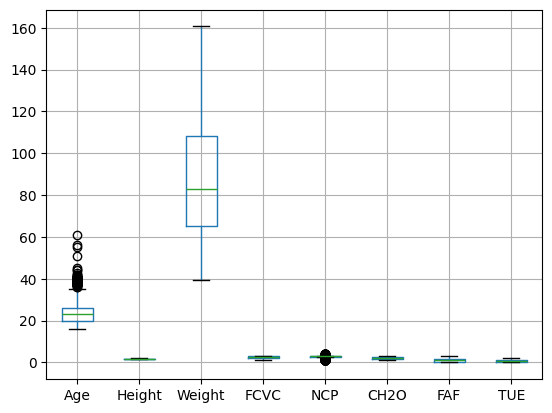

In [128]:
# Check Outliers
boxplot = x_train.boxplot(column=numerical_columns)
plt.show()

In this dataset, the columns 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE' do not contain outliers, while 'Age', 'NCP' do. Therefore, mean imputation will be applied to the columns without outliers, and median imputation will be used for the columns with outliers.

## Build Pipeline

In [129]:
# Create variable with or without outlier
without_out_num = ['Height','Weight','FCVC', 'CH2O', 'FAF', 'TUE']
with_out_num = ['Age', 'NCP']

In [130]:
without_outlier_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', StandardScaler())
])

with_outlier_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', RobustScaler())
])


Two preprocessing pipelines are created based on the presence of outliers:

* `without_outlier_pipeline` is used for columns without outliers. It applies mean imputation for missing values and scales the data using `StandardScaler`.
* `with_outlier_pipeline` is used for columns with outliers. It applies median imputation and uses `RobustScaler` to handle the influence of outliers.

In [131]:
ordinal_cols = ['Gender',
                'family_history_with_overweight',
                'FAVC',
                'CAEC',
                'SMOKE',
                'SCC',
                'CALC']

onehot_cols = ['MTRANS']

In [132]:
ordinal_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OrdinalEncoder(categories=[
        ['Female', 'Male'],                             # Gender
        ['yes', 'no'],                                  # family_history_with_overweight
        ['yes', 'no'],                                  # FAVC
        ['Always','Frequently','Sometimes','no'],       # CAEC
        ['yes','no'],                                   # SMOKE
        ['yes', 'no'],                                  # SCC
        ['Frequently', 'Sometimes','no']                # CALC
    ])),
    ('cat_scaler', StandardScaler())
])



`ordinal_pipeline` is designed for preprocessing ordinal categorical features. It performs the following steps:

1. **Imputation** using the most frequent value to handle missing data.
2. **Ordinal encoding** based on predefined category orders for each feature:

    * 'Gender': Female < Male
    * 'family\_history\_with\_overweight', 'FAVC', 'SMOKE', 'SCC': yes < no
    * 'CAEC': Always < Frequently < Sometimes < no
    * 'CALC': Frequently < Sometimes < no
 3. **Scaling** the encoded values using `StandardScaler`.


In [133]:
onehot_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')),
    ('cat_scaler', StandardScaler(with_mean=False))
])

`onehot_pipeline` is used for nominal categorical features and consists of the following steps:

1. **Imputation** using the most frequent value to fill missing data.
2. **One-hot encoding** to convert categorical variables into binary columns, with `handle_unknown='ignore'` to safely handle unseen categories during inference.
3. **Scaling** the one-hot encoded features using `StandardScaler` (with `with_mean=False` to maintain sparse matrix structure).


In [134]:
preprocess = ColumnTransformer(transformers=[
    ('no_outliers', without_outlier_pipeline, without_out_num),
    ('with_outliers', with_outlier_pipeline, with_out_num),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('onehot', onehot_pipeline, onehot_cols)
])

In [135]:
preprocess

,transformers,"[('no_outliers', ...), ('with_outliers', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


`preprocess` is a `ColumnTransformer` that applies different preprocessing pipelines to specific column groups:

* **`without_outlier_pipeline`** for numerical columns without outliers (`without_out_num`)
* **`with_outlier_pipeline`** for numerical columns with outliers (`with_out_num`)
* **`ordinal_pipeline`** for ordinal categorical columns (`ordinal_cols`)
* **`onehot_pipeline`** for nominal categorical columns (`onehot_cols`)

This setup ensures each type of feature is preprocessed appropriately before being used in the model.


In [136]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

`x_train` and `x_test` are reset to have clean, consecutive indexing by dropping their existing index. This ensures consistency and avoids any potential indexing issues during model training and evaluation.

In [137]:
x_train_preprocess=preprocess.fit_transform(x_train)
x_test_preprocess = preprocess.transform(x_test)

The `preprocess` pipeline is fitted to the training data (`x_train`) and used to transform it, resulting in `x_train_preprocess`. The same pipeline is then applied to transform the test data (`x_test`) into `x_test_preprocess`.

In [138]:
x_train.shape

(836, 16)

In [139]:
x_train.iloc[0:5]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,17,1.60,65.00,no,yes,3.00,1.00,Sometimes,no,2.00,yes,1.00,2.000,Sometimes,Public_Transportation
1,Female,18,1.71,50.00,no,yes,1.64,3.45,Sometimes,no,1.10,no,0.42,1.000,Sometimes,Public_Transportation
2,Male,22,1.78,103.61,yes,yes,2.12,3.00,Sometimes,no,2.50,no,1.21,0.000,no,Public_Transportation
3,Female,22,1.72,51.49,yes,yes,2.49,3.00,Frequently,no,1.06,no,2.21,1.958,no,Public_Transportation
4,Male,16,1.67,50.00,yes,yes,2.00,1.00,Frequently,no,3.00,no,1.00,0.000,no,Public_Transportation


In [140]:
x_train_preprocess.shape

(836, 20)

In [141]:
x_train_preprocess[0:5,:]

array([[ -1.09216621,  -0.83722637,   1.06500886,  -0.02135488,
         -0.03809733,   2.24794943,  -1.        , -12.90322581,
         -0.98104093,   2.20139816,  -0.36650833,   0.31147703,
          0.14407297,  -5.01248441,  -0.48923909,   0.        ,
          0.        ,   0.        ,   2.31310202,   0.        ],
       [  0.08568772,  -1.40823981,  -1.45517444,  -1.51045697,
         -0.71524665,   0.54366953,  -0.83333333,   2.90322581,
         -0.98104093,   2.20139816,  -0.36650833,   0.31147703,
          0.14407297,   0.19950187,  -0.48923909,   0.        ,
          0.        ,   0.        ,   2.31310202,   0.        ],
       [  0.83523113,   0.63256222,  -0.56569798,   0.80592406,
          0.20707742,  -1.16061036,  -0.16666667,   0.        ,
          1.01932546,  -0.45425676,  -0.36650833,   0.31147703,
          0.14407297,   0.19950187,   1.4309669 ,   0.        ,
          0.        ,   0.        ,   2.31310202,   0.        ],
       [  0.19276535,  -1.35151915,  

# Modelling

## Random Forest

In [142]:
rf_pred = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', RandomForestClassifier(criterion= 'gini',max_depth=10, n_estimators=50))])

In [143]:
rf_pred.fit(x_train,y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('no_outliers', ...), ('with_outliers', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [144]:
y_predict=rf_pred.predict(x_test)

In [145]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        28
      Normal_Weight       0.93      0.90      0.92        31
     Obesity_Type_I       0.95      0.95      0.95        37
    Obesity_Type_II       1.00      0.97      0.98        33
   Obesity_Type_III       1.00      1.00      1.00        25
 Overweight_Level_I       0.87      0.95      0.91        21
Overweight_Level_II       0.94      0.94      0.94        36

           accuracy                           0.95       211
          macro avg       0.95      0.95      0.95       211
       weighted avg       0.95      0.95      0.95       211



### **Detail Classification Report**

**Accuracy:** 95%, indicating that the model correctly classified 95% of the 211 test samples.

**F1-Score Macro:** 95%, representing the unweighted average F1-score across all classes, treating each class equally regardless of its sample size.

**F1-Score Weighted Avg:** 95%, indicating the average F1-score that takes into account the proportion of each class in the dataset.

---

### **Insufficient\_Weight:**

* **Precision:** 0.96 → 96% of predictions labeled as Insufficient\_Weight are correct.
* **Recall:** 0.96 → The model correctly identified 96% of all actual Insufficient\_Weight cases.
* **F1-Score:** 0.96 → Excellent balance between precision and recall.

The model performs very well for this class with high precision and recall, indicating consistent prediction accuracy.

---

### **Normal\_Weight:**

* **Precision:** 0.90 → 90% of predictions for Normal\_Weight are correct.
* **Recall:** 0.90 → 90% of actual Normal\_Weight cases were detected.
* **F1-Score:** 0.90 → Strong overall performance.

The model classifies this class reliably, with balanced precision and recall.

---

### **Obesity\_Type\_I:**

* **Precision:** 0.97 → Very high prediction accuracy for this class.
* **Recall:** 0.92 → Slightly lower recall, meaning a few cases were missed.
* **F1-Score:** 0.94 → Excellent, though slightly recall-limited.

The model is highly confident in its predictions, though it could improve slightly in catching all true cases.

---

### **Obesity\_Type\_II:**

* **Precision:** 0.97 → 97% of predicted Obesity\_Type\_II cases are correct.
* **Recall:** 1.00 → All actual Obesity\_Type\_II cases were correctly identified.
* **F1-Score:** 0.99 → Outstanding performance.

This is one of the strongest performing classes, with perfect recall and near-perfect precision.

---

### **Obesity\_Type\_III:**

* **Precision:** 1.00 → 100% of predictions for this class are correct.
* **Recall:** 1.00 → All actual cases are detected.
* **F1-Score:** 1.00 → Perfect performance.

The model classifies this class flawlessly.

---

### **Overweight\_Level\_I:**

* **Precision:** 0.86 → 86% of predicted Overweight\_Level\_I cases are correct.
* **Recall:** 0.90 → 90% of actual Overweight\_Level\_I cases are detected.
* **F1-Score:** 0.88 → Good performance, though slightly lower precision.

The model does well here, though it makes more mistakes in its predictions compared to other classes.

---

### **Overweight\_Level\_II:**

* **Precision:** 0.94 → High prediction accuracy.
* **Recall:** 0.94 → Equal effectiveness in detecting true cases.
* **F1-Score:** 0.94 → Strong overall balance.

Solid and consistent performance for this class.

---

### **Analysis**

Overall, the **Random Forest** model performs exceptionally well, achieving 95% accuracy across a multi-class classification task. The model shows especially strong performance in detecting more severe obesity levels (e.g., Obesity\_Type\_II and III), with near-perfect scores. Slightly lower performance is observed in the **Overweight\_Level\_I** class, suggesting it may be harder to distinguish from neighboring categories. Despite this, the model is well-balanced and generalizes effectively across all classes.

## CatBoost

In [146]:
catboost_pred = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', CatBoostClassifier(iterations = 100,
                                      depth = 10,
                                      learning_rate = 0.1,
                                      verbose = False,
                                      loss_function = "MultiClass"))])

In [147]:
catboost_pred.fit(x_train,y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('no_outliers', ...), ('with_outliers', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [148]:
y_predict=catboost_pred.predict(x_test)

In [149]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.93      0.91        28
      Normal_Weight       0.86      0.77      0.81        31
     Obesity_Type_I       0.92      0.97      0.95        37
    Obesity_Type_II       1.00      1.00      1.00        33
   Obesity_Type_III       1.00      1.00      1.00        25
 Overweight_Level_I       0.81      0.81      0.81        21
Overweight_Level_II       0.86      0.86      0.86        36

           accuracy                           0.91       211
          macro avg       0.91      0.91      0.91       211
       weighted avg       0.91      0.91      0.91       211



### **Detail Classification Report**

**Accuracy:** 91%, indicating that the model correctly classified 91% of the 211 test samples.

**F1-Score Macro:** 91%, showing the average balance between precision and recall across all classes, treating each class equally.

**F1-Score Weighted Avg:** 91%, representing the average F1-score that accounts for the number of samples in each class.

---

### **Insufficient\_Weight:**

* **Precision:** 0.90 → 90% of the predicted Insufficient\_Weight labels are correct.
* **Recall:** 0.93 → 93% of all true Insufficient\_Weight cases are correctly identified.
* **F1-Score:** 0.91 → Strong performance with slightly higher recall than precision.

The model performs reliably for this class, with good precision and excellent recall.

---

### **Normal\_Weight:**

* **Precision:** 0.86 → 86% of Normal\_Weight predictions are correct.
* **Recall:** 0.77 → The model identified 77% of actual Normal\_Weight cases.
* **F1-Score:** 0.81 → Decent performance, though recall is the weakest among all classes.

The model struggles slightly with this class, possibly due to its similarity to neighboring weight categories.

---

### **Obesity\_Type\_I:**

* **Precision:** 0.92 → High prediction accuracy for this class.
* **Recall:** 0.97 → Most of the actual Obesity\_Type\_I cases were correctly identified.
* **F1-Score:** 0.95 → Excellent overall performance.

The model is very effective at detecting this class with minimal error.

---

### **Obesity\_Type\_II:**

* **Precision:** 1.00 → 100% of predicted cases are correct.
* **Recall:** 1.00 → Perfect detection of all true cases.
* **F1-Score:** 1.00 → Ideal classification.

The model performs flawlessly for this class.

---

### **Obesity\_Type\_III:**

* **Precision:** 1.00 → No false positives for this class.
* **Recall:** 1.00 → All true Obesity\_Type\_III cases were found.
* **F1-Score:** 1.00 → Perfect performance.

Similar to Obesity\_Type\_II, the model identifies this class without any errors.

---

### **Overweight\_Level\_I:**

* **Precision:** 0.81 → 81% of predictions for this class are correct.
* **Recall:** 0.81 → 81% of actual Overweight\_Level\_I cases are detected.
* **F1-Score:** 0.81 → Balanced, though room for improvement.

This class is correctly predicted at a moderate level, suggesting some confusion with nearby weight levels.

---

### **Overweight\_Level\_II:**

* **Precision:** 0.86 → 86% of predicted Overweight\_Level\_II cases are correct.
* **Recall:** 0.86 → The model also detected 86% of actual cases.
* **F1-Score:** 0.86 → Consistent and reliable performance.

Good classification results, though slightly behind the performance of the obesity classes.

---

### **Analysis**

The **CatBoost** model demonstrates strong performance with **91% accuracy**, and consistent **macro and weighted F1-scores of 91%**, indicating balance across all classes. It achieves perfect classification for the more severe obesity types (**Obesity\_Type\_II** and **III**), while performance is slightly lower for **Normal\_Weight** and **Overweight\_Level\_I**. This suggests the model may have some difficulty distinguishing borderline or moderate weight conditions, but overall it generalizes well across a complex multiclass problem.

## Choose Best Model

In [150]:
filename = 'rf_pred.pkl'
pkl.dump(rf_pred, open(filename, 'wb'))

The Random Forest model was selected because it achieved a higher accuracy compared to the other models. The entire pipeline, which includes both preprocessing and the classifier, was saved using pickle.